<a href="https://colab.research.google.com/github/bhavani12860/Fmml-labs/blob/main/Copy_of_FMML_Module4_Lab4_June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4
## Lab 4: Support Vector Machines

In [1]:
#Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt

The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

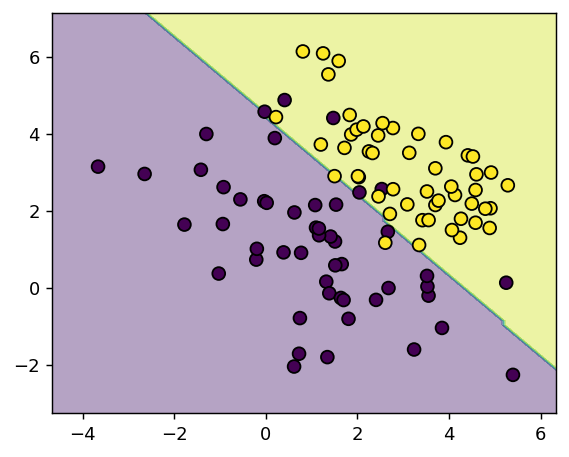

In [2]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)

  plt.show()

boundaryExp()

## Intuitive introduction to SVMs:

![SVM](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

SVMs are an iterative approach of trying to find the optimal hyperplane that divides the multidimentional space into different classes present in the dataset.


**Hyperplanes:** These are the decision planes that separate the objects of classes that we are trying to classify.

**Support Vectors** : Support vectors are the points from dataset that are closest to the hyperplane that divides the dataset.

**Margin**:  The gap between the closest support vectors from the different class along the direction perpendicular to the hyperplane. Simply put, it is the sum of perpendicular distance of the support vector of each class to the hyperplane.

---

Let us try to fall back to the well known dataset and see how SVMs perform on the iris dataset

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


Accuracy of the decision tree on the test set: 

0.921


The confusion matrix is : 


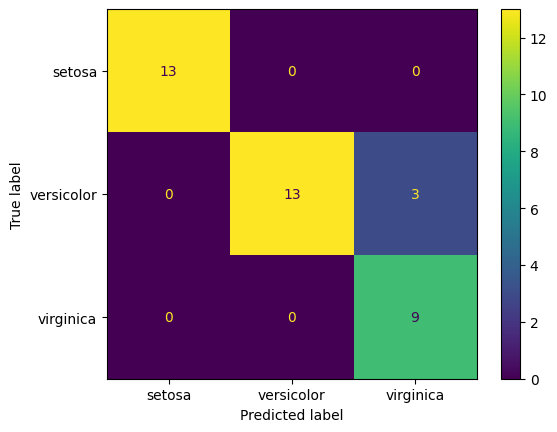

In [4]:
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
class_names = iris["target_names"]
print("The confusion matrix is : ")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='.0f')

plt.show()

Now lets again try to see how does SVM perform when we give it just two of the features from the dataset

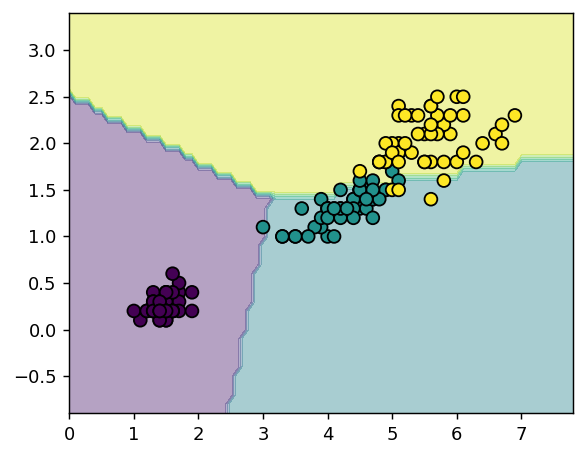

In [ ]:
clf = svm.LinearSVC()
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

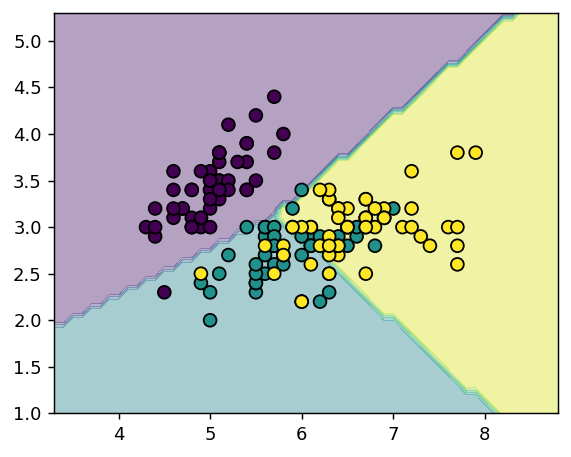

In [5]:
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

#### Alas! We see that SVMs are not able to classify the data in the above experiment because the data is not **linearly separable**

Thankfully, We have a neat trick up our sleeves that will help us to solve these problems. Let us take a look at a typical example that is used to illustrate this trick before we get back to the above dataset.

---

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


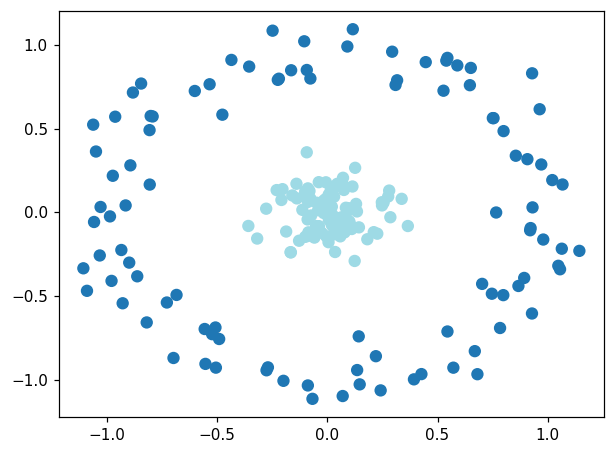

In [6]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)

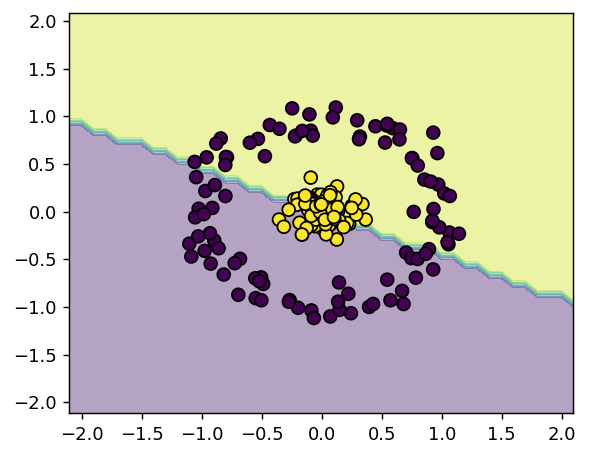

In [7]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [9]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [10]:
X_new = np.hstack((X, Z))

In [11]:
import plotly.graph_objects as go

In [12]:
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

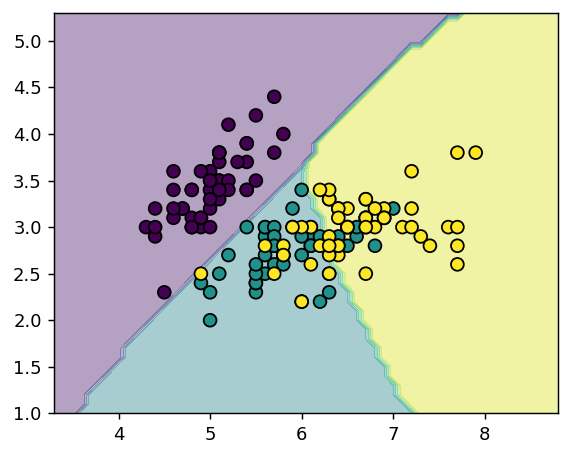

In [14]:
plt.style.use("default")
clf = svm.SVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

Accuracy of the decision tree on the test set: 

0.974


The confusion matrix is : 


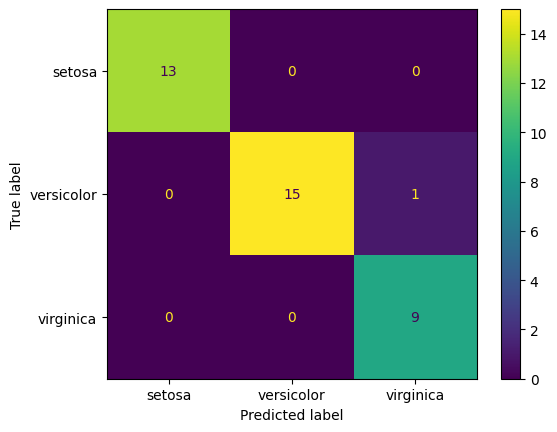

In [13]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
class_names = iris["target_names"]
print("The confusion matrix is : ")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='.0f')

plt.show()

Certainly, using a kernel has increased our accuracy on the iris dataset.

Things to try out:
- Try to run the same experiment after filtering different features, 2 at a time.
- Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

In [18]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations
import pandas as pd
import numpy as np

# Example dataset
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'feature4': np.random.rand(100),
    'target': np.random.choice([0, 1], size=100)
})

features = ['feature1', 'feature2', 'feature3', 'feature4']
X = data[features]
y = data['target']

# Generate all pairs of features to exclude
feature_combinations = list(combinations(features, 2))

# Results storage
results = []

# Experiment loop
for combo in feature_combinations:
    # Filter dataset
    filtered_X = X.drop(columns=list(combo))
    X_train, X_test, y_train, y_test = train_test_split(filtered_X, y, test_size=0.3, random_state=42)

    # Loop through kernels
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        clf = SVC(kernel=kernel, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({'excluded_features': combo, 'kernel': kernel, 'accuracy': accuracy})

    # Precomputed kernel
    kernel_matrix_train = np.dot(X_train, X_train.T)  # Example: linear kernel matrix
    kernel_matrix_test = np.dot(X_test, X_train.T)

    clf = SVC(kernel='precomputed')
    clf.fit(kernel_matrix_train, y_train)
    y_pred = clf.predict(kernel_matrix_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'excluded_features': combo, 'kernel': 'precomputed', 'accuracy': accuracy})

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display results
print(results_df)

       excluded_features       kernel  accuracy
0   (feature1, feature2)       linear  0.433333
1   (feature1, feature2)         poly  0.466667
2   (feature1, feature2)          rbf  0.500000
3   (feature1, feature2)      sigmoid  0.633333
4   (feature1, feature2)  precomputed  0.433333
5   (feature1, feature3)       linear  0.433333
6   (feature1, feature3)         poly  0.433333
7   (feature1, feature3)          rbf  0.533333
8   (feature1, feature3)      sigmoid  0.366667
9   (feature1, feature3)  precomputed  0.433333
10  (feature1, feature4)       linear  0.433333
11  (feature1, feature4)         poly  0.466667
12  (feature1, feature4)          rbf  0.466667
13  (feature1, feature4)      sigmoid  0.700000
14  (feature1, feature4)  precomputed  0.433333
15  (feature2, feature3)       linear  0.433333
16  (feature2, feature3)         poly  0.466667
17  (feature2, feature3)          rbf  0.633333
18  (feature2, feature3)      sigmoid  0.366667
19  (feature2, feature3)  precomputed  0

In [16]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations
import pandas as pd
import numpy as np

# Example dataset
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'feature4': np.random.rand(100),
    'target': np.random.choice([0, 1], size=100)
})

features = ['feature1', 'feature2', 'feature3', 'feature4']
X = data[features]
y = data['target']

# Generate all pairs of features to exclude
feature_combinations = list(combinations(features, 2))

# Results storage
results = []

# Experiment loop
for combo in feature_combinations:
    # Filter dataset
    filtered_X = X.drop(columns=list(combo))
    X_train, X_test, y_train, y_test = train_test_split(filtered_X, y, test_size=0.3, random_state=42)

    # Loop through kernels
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        clf = SVC(kernel=kernel, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({'excluded_features': combo, 'kernel': kernel, 'accuracy': accuracy})

    # Precomputed kernel (example: linear kernel matrix)
    kernel_matrix_train = np.dot(X_train, X_train.T)
    kernel_matrix_test = np.dot(X_test, X_train.T)

    clf = SVC(kernel='precomputed')
    clf.fit(kernel_matrix_train, y_train)
    y_pred = clf.predict(kernel_matrix_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'excluded_features': combo, 'kernel': 'precomputed', 'accuracy': accuracy})

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
print(results_df)

       excluded_features       kernel  accuracy
0   (feature1, feature2)       linear  0.566667
1   (feature1, feature2)         poly  0.533333
2   (feature1, feature2)          rbf  0.566667
3   (feature1, feature2)      sigmoid  0.633333
4   (feature1, feature2)  precomputed  0.566667
5   (feature1, feature3)       linear  0.566667
6   (feature1, feature3)         poly  0.566667
7   (feature1, feature3)          rbf  0.566667
8   (feature1, feature3)      sigmoid  0.500000
9   (feature1, feature3)  precomputed  0.566667
10  (feature1, feature4)       linear  0.566667
11  (feature1, feature4)         poly  0.600000
12  (feature1, feature4)          rbf  0.566667
13  (feature1, feature4)      sigmoid  0.466667
14  (feature1, feature4)  precomputed  0.566667
15  (feature2, feature3)       linear  0.566667
16  (feature2, feature3)         poly  0.566667
17  (feature2, feature3)          rbf  0.566667
18  (feature2, feature3)      sigmoid  0.566667
19  (feature2, feature3)  precomputed  0

## **Additional Critical Thinking Questions**

Consider    a   2-class classification  problem in  a   2-dimensional   feature space   x=[x1,  x2] with    target  variable    y=±1.   The training    data    comprises   7
samples as  shown   in  figure (4   black   diamonds    for the positive    class   and 3   white   diamonds    for the negative    class). The “maximum    margin  classifier”
(also   called  linear  “hard   margin” SVM)    is  a   classifier  that    leaves  the largest possible    margin  on  either  side    of  the decision    boundary.   The samples lying   on  the margin  are called  support vectors.

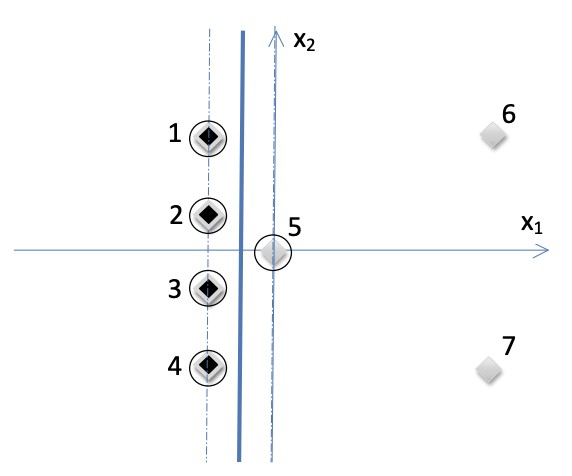


1. Draw the decision    boundary    obtained    by  the linear  hard
margin  SVM method  with    a   thick   solid   line.   Draw    the margins on  either  side with   thinner dashed  lines.  Identify    the support vect
              2. What is  the training    error   rate?

   3. The  removal of  which   sample  wil   change  the decision    boundary?

4. What is  the leave-one-out   error   rate?

In [ ]:

from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import numpy as np

# Example dataset
X = np.random.rand(100, 2)  # 100 samples with 2 features
y = np.random.choice([0, 1], size=100)  # Binary target

# Initialize LOO cross-validator
loo = LeaveOneOut()
errors = 0

# Loop through each LOO split
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train SVM
    svm = SVC(kernel='linear', C=1e10)  # Hard-margin approximation
    svm.fit(X_train, y_train)

    # Test on the left-out sample
    y_pred = svm.predict(X_test)
    if y_pred != y_test:
        errors += 1

# Calculate LOO error rate
loo_error_rate = errors / len(y)
print(f"LOO Error Rate: {loo_error_rate:.2%}")

In [21]:

# Support vectors
support_vectors = svm.support_vectors_

# Indices of support vectors
support_indices = svm.support_
print("Support Vectors:")
print(support_vectors)
print("Indices of Support Vectors:")
print(support_indices)

Support Vectors:
[[-0.07133524  0.08896214]
 [-0.53963044 -0.72427983]
 [-0.15013844 -0.11708689]]
Indices of Support Vectors:
[25 60 21]


In [20]:

# Predict labels for the training data
y_pred = svm.predict(X)

# Calculate the number of misclassified samples
num_errors = np.sum(y_pred != y)

# Training error rate
training_error_rate = num_errors / len(y)

print(f"Number of misclassified samples: {num_errors}")
print(f"Training error rate: {training_error_rate:.2%}")

Number of misclassified samples: 0
Training error rate: 0.00%


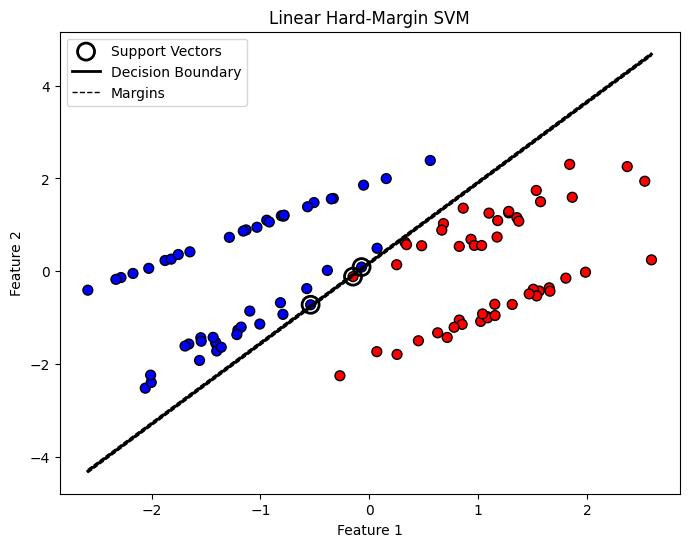

In [19]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Create a simple 2D dataset
X, y = make_classification(
    n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42
)
y = 2 * y - 1  # Convert to {-1, 1} for SVM

# Fit a linear SVM with a hard margin (C=large)
svm = SVC(kernel='linear', C=1e10)
svm.fit(X, y)

# Get the separating hyperplane
w = svm.coef_[0]
b = svm.intercept_[0]

# Decision boundary: w[0] * x1 + w[1] * x2 + b = 0
# Rearrange: x2 = -(w[0]/w[1]) * x1 - b/w[1]
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
decision_boundary = -(w[0] / w[1]) * x1_range - b / w[1]

# Margins: w[0] * x1 + w[1] * x2 + b = ±1
margin_pos = decision_boundary + 1 / w[1]
margin_neg = decision_boundary - 1 / w[1]

# Plot
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50)

# Highlight support vectors
plt.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=150,
    facecolors='none',
    edgecolors='k',
    linewidth=2,
    label='Support Vectors'
)

# Plot decision boundary and margins
plt.plot(x1_range, decision_boundary, 'k-', linewidth=2, label='Decision Boundary')
plt.plot(x1_range, margin_pos, 'k--', linewidth=1, label='Margins')
plt.plot(x1_range, margin_neg, 'k--', linewidth=1)

# Labels and legend
plt.title("Linear Hard-Margin SVM")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


---

Helpful References and sources:

- https://datamites.com/blog/support-vector-machine-algorithm-svm-understanding-kernel-trick/
- https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
- https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
